La segmentación de imágenes consiste en dividir una imagen en varios segmentos.

En la _segmentación semántica_, todos los píxeles que forman parte del mismo tipo de objeto se asignan al mismo segmento. Por ejemplo, en el sistema de visión de un vehículo autónomo, todos los píxeles que forman parte de la imagen de un peatón podrían asignarse al segmento "peatón" (habría un segmento que contendría a todos los peatones).

En la _segmentación por instancias_, todos los píxeles que forman parte del mismo objeto individual se asignan al mismo segmento. En este caso, habría un segmento diferente para cada peatón.

El estado del arte en segmentación semántica o por instancias se logra mediante arquitecturas complejas basadas en redes neuronales convolucionales . Aquí vamos a hacer algo mucho más sencillo: _segmentación por colores_. Simplemente asignaremos los píxeles al mismo segmento si tienen un color similar.

En algunas aplicaciones, esto puede ser suficiente. Por ejemplo, si se desea analizar imágenes satelitales para medir cuánta superficie forestal total hay en una región, la segmentación por colores puede ser suficiente.

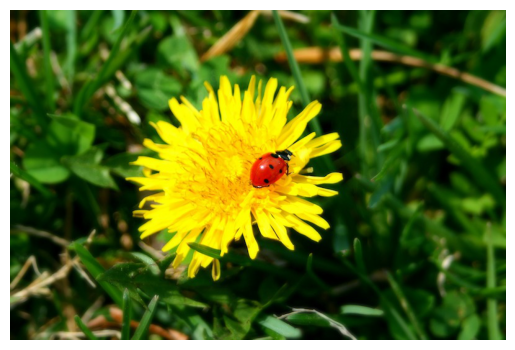

In [4]:
import matplotlib.pyplot as plt
from PIL import Image

image = Image.open('./2_imagenes/ladybug.png')

plt.imshow(image)
plt.axis('off')
plt.show()

In [5]:
%cd '/content/drive/MyDrive/Inteligencia Artificial y Aprendizaje Maquinal/IA - Clases de Práctica/ContenidosPorTemas/ActividadesPracticas/AM_Clustering'

/content/drive/MyDrive/Inteligencia Artificial y Aprendizaje Maquinal/IA - Clases de Práctica/ContenidosPorTemas/ActividadesPracticas/AM_Clustering


In [7]:
import numpy as np
import PIL #Python Imaging Library

image = np.asarray(PIL.Image.open('2_imagenes/ladybug.png'))
image.shape

(533, 800, 3)

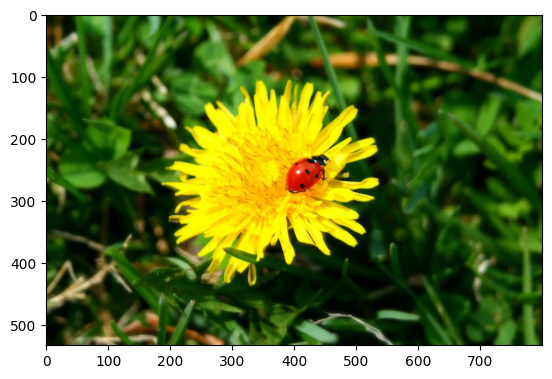

In [8]:
import matplotlib.pyplot as plt

_ = plt.imshow(image)

In [9]:
image.shape

(533, 800, 3)

In [10]:
X = image.reshape(-1, 3)
X.shape

(426400, 3)

Utilice el algoritmo de kmeans para segmentar la imagen en distintos colores, pruebe con distintos valores de k. Segmentar la imagen implica reemplazar cada instancia (cada pixel de la imagen) por el centroide asignado por el algoritmo. Use los atributos `cluster_centers_` y `labels_`.

Después de aplicar el algoritmo y segmentar la imagen, grafique la imagen segmentada representada mediante los centroides encontrados. No olvide redimensonar y escalar los datos antes de graficar.¿Qué valor de k considera adecuado para discriminar todos los colores en la imagen?  

Grafique algunas capas de colores por separado. Puede utilizar la siguiente herramienta online: https://www.rapidtables.com/convert/color/rgb-to-hex.html

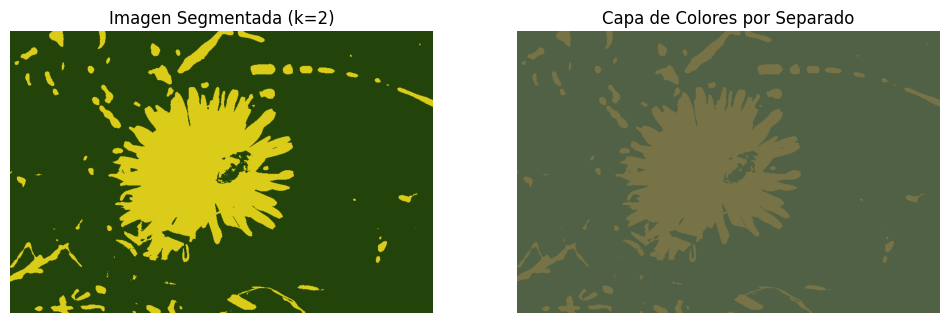

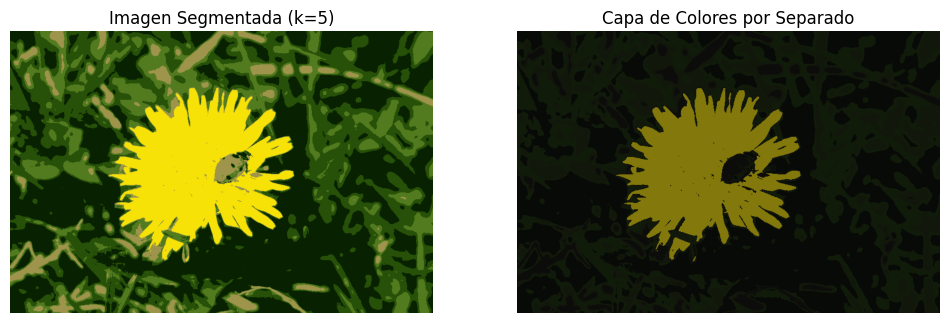

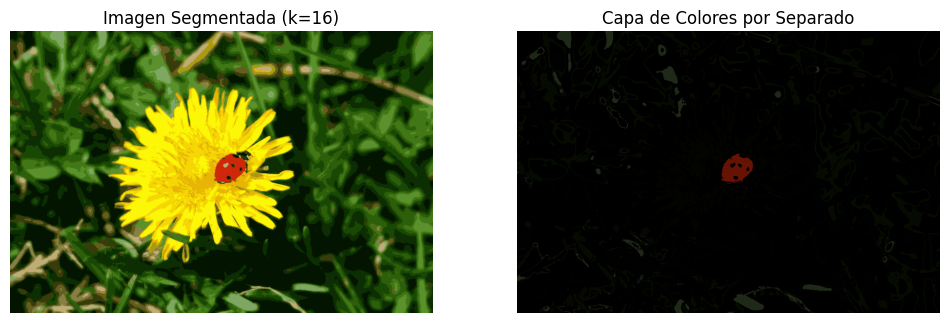

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from PIL import Image

image = Image.open('./2_imagenes/ladybug.png')
pixel_values = np.array(image)

pixel_values = pixel_values.reshape((-1, 3))  # Reformatea a una lista de píxeles
pixel_values = pixel_values.astype(float) / 255.0  # Escala a [0, 1]

k_values = [2, 5, 16]

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(pixel_values)

    # 4. Obtiene los centroides y etiquetas
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_

    # 5. Segmenta la imagen
    segmented_image = centroids[labels].reshape(image.size[1], image.size[0], 3)

    # Redimensiona la imagen segmentada a un rango de 0 a 255 para visualizar
    segmented_image = (segmented_image * 255).astype(np.uint8)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title(f'Imagen Segmentada (k={k})')
    plt.imshow(segmented_image)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Capa de Colores por Separado')
    for i in range(k):
        color_layer = np.zeros_like(segmented_image, dtype=np.uint8)
        color_layer[labels.reshape(image.size[1], image.size[0]) == i] = centroids[i] * 255
        plt.imshow(color_layer, alpha=0.5)
    plt.axis('off')
    plt.show()

